Epoch 1: Loss = 0.20402566485572607
Epoch 11: Loss = 0.0032114776336806374
Epoch 21: Loss = 0.0008793145889434584
Epoch 31: Loss = 0.0003265011541332896
Epoch 41: Loss = 0.00021571713838344664
Epoch 51: Loss = 0.00018186397736486058
Epoch 61: Loss = 0.00016028237695053349
Epoch 71: Loss = 0.00013957932431308607
Epoch 81: Loss = 0.0001224728528535346
Epoch 91: Loss = 0.00010650133875341084


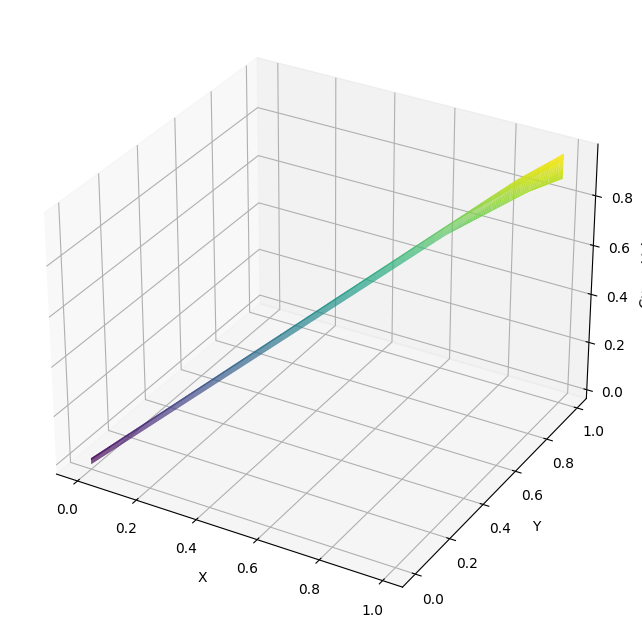

In [25]:
import numpy as np
import torch
import torch.nn as nn

# Step 1: Generate Data
x = np.arange(0, 1, 0.01)
y = np.sin(2 * np.pi * x) + 0.001 * np.random.randn(len(x))

# Step 2: Define your model
class CurveFitter(nn.Module):
    def __init__(self):
        super(CurveFitter, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Step 3: Define your loss function and optimizer
model = CurveFitter()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train your model
for epoch in range(100):
    running_loss = 0.0
    for i in range(len(x)):
        inputs = torch.tensor([x[i], y[i]], dtype=torch.float32)
        labels = torch.tensor([np.sin(2 * np.pi * x[i])], dtype=torch.float32)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    if epoch%10==0: print(f"Epoch {epoch+1}: Loss = {running_loss/len(x)}")

# Step 5: Use your model to predict the curve values
x_test = np.arange(0, 1, 0.01)
y_test = np.arange(0, 1, 0.01)
curve_predictions = []

for i in range(len(x_test)):
    for j in range(len(y_test)):
        inputs = torch.tensor([x_test[i], y_test[j]], dtype=torch.float32)
        prediction = model(inputs).item()
        curve_predictions.append(prediction)

curve_predictions = np.array(curve_predictions).reshape(len(x_test), len(y_test))

# Plot the results
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_test, y_test, curve_predictions, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Curve Value')
plt.show()


array([[-0.2233919 ],
       [-0.2239224 ],
       [-0.2244529 ],
       [-0.22498347],
       [-0.22551402],
       [-0.22604454],
       [-0.22657503],
       [-0.22710562],
       [-0.22763613],
       [-0.22816661],
       [-0.22869721],
       [-0.22922778],
       [-0.22975823],
       [-0.2302888 ],
       [-0.23081933],
       [-0.23134986],
       [-0.23188043],
       [-0.23241091],
       [-0.23294146],
       [-0.2334719 ],
       [-0.23400249],
       [-0.23453303],
       [-0.23170431],
       [-0.22835188],
       [-0.22499953],
       [-0.22164714],
       [-0.21829471],
       [-0.21494237],
       [-0.21158996],
       [-0.20823756],
       [-0.20488511],
       [-0.20153272],
       [-0.19818039],
       [-0.19482793],
       [-0.19147551],
       [-0.18812318],
       [-0.18477076],
       [-0.18141834],
       [-0.17806591],
       [-0.17471358],
       [-0.17136116],
       [-0.16800879],
       [-0.16465633],
       [-0.15439208],
       [-0.13319299],
       [-0

IndexError: index 49 is out of bounds for axis 1 with size 1

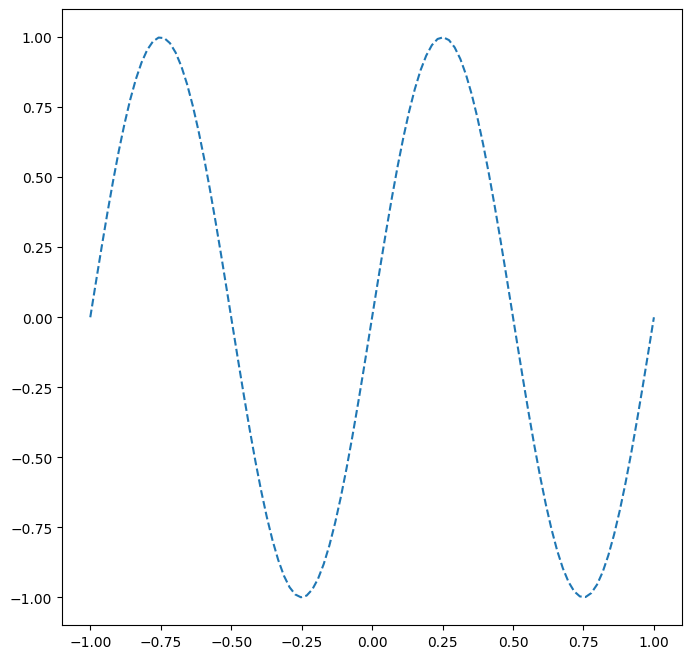

In [28]:
import matplotlib.pyplot as plt

# Generate test input values
x_test = torch.linspace(-1, 1, 100)
y_test = torch.linspace(-1, 1, 100)

# Compute curve predictions for test input values
curve_predictions = model(torch.stack([x_test, y_test], axis=1)).detach().numpy()
display(curve_predictions)

# Plot the curve in the xy-plane
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(x_test, np.sin(2*np.pi*x_test), label='True Curve', linestyle='--')
ax.plot(x_test, curve_predictions[:, 49], label='Predicted Curve')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()


In [24]:
if 10%11==0: print('h')